In [1]:
import glob
import os 

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.4)

In [4]:
def bin_data_frame(df, groupby, sumof, bin_width=10):
    top = df[groupby].max()
    l = []
    for i in range(0,top, bin_width):
        mask = (df[groupby] >= i) & (df[groupby] < i+bin_width)
        l.append(df[mask][sumof].sum())
    return pd.Series(l, index=range(0,top, bin_width))

def plot_binned_df(df, groupby, sumof, bin_width=None):
    if bin_width is None:
        bin_width = int(df[groupby].mean() / 7)
    series = bin_data_frame(df, groupby, sumof, bin_width)
    ax = series.plot.bar(title=groupby+" Distribution")
    ax.set(xlabel=groupby, ylabel=sumof)
    return ax

path = r"E:\Files\CodeProjects\MATSim\Scenarios\downscaling-test-line-speed60"
network_path = os.path.join(path, "GridNetwork-1_130")
population_path = os.path.join(path, "Population-10000-k1.0.xml")

# Network stats

Text(0.5, 1.0, 'Links length histogram')

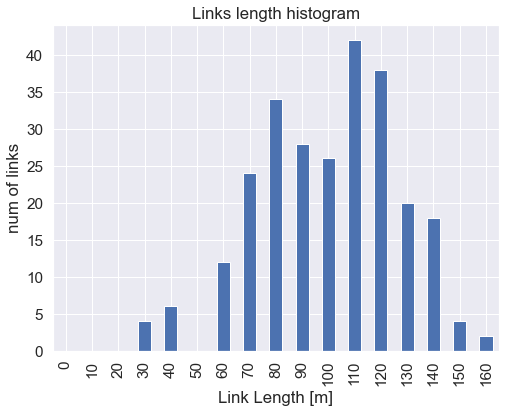

In [5]:
data_file = network_path + ".linkLengthDistribution.csv"
link_data = pd.read_csv(data_file, delimiter=";")
link_data["num of links"] = link_data["Count"]

plt.figure(figsize=(8,6))

ax = plot_binned_df(link_data, "LinkLength", "num of links", 10)
ax.set_xlabel("Link Length [m]")
ax.set_title("Links length histogram")

# Population stats

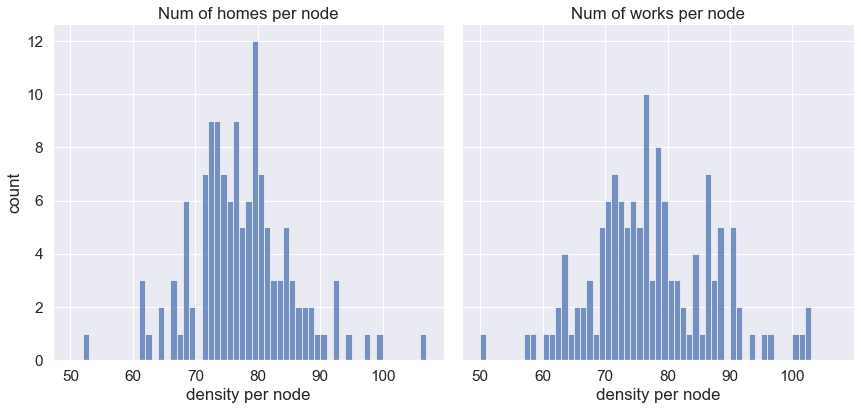

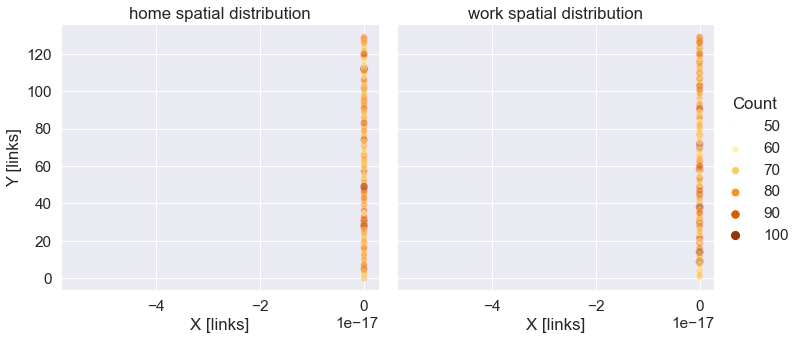

In [6]:
data_file = population_path + ".NodesStats.csv"
node_stats = pd.read_csv(data_file, delimiter=";")
node_stats = node_stats.replace({"Type" : {1: "work", 0: "home"}})

# population density on node histogram
g = sns.FacetGrid(node_stats, col="Type", height=6)
g.map(sns.histplot, "Count", binwidth=1)

g.set_axis_labels(x_var="density per node", y_var="count")
g.set_titles("Num of {col_name}s per node")


# Population spatial distribution
node_stats[["x","y"]] = node_stats["NodeId"].str.replace(")", "").str.replace("(", "").str.split(",", expand=True)
node_stats["x"] = pd.to_numeric(node_stats["x"])
node_stats["y"] = pd.to_numeric(node_stats["y"])


facet = sns.relplot(data=node_stats, x="x", y="y", hue="Count", size="Count", 
                col="Type",
                edgecolors=None, alpha=0.5, palette="YlOrBr")
facet.set_axis_labels(x_var="X [links]", y_var="Y [links]")
facet.set_titles("{col_name} spatial distribution")

Text(0.5, 1.0, 'Home-Work distance')

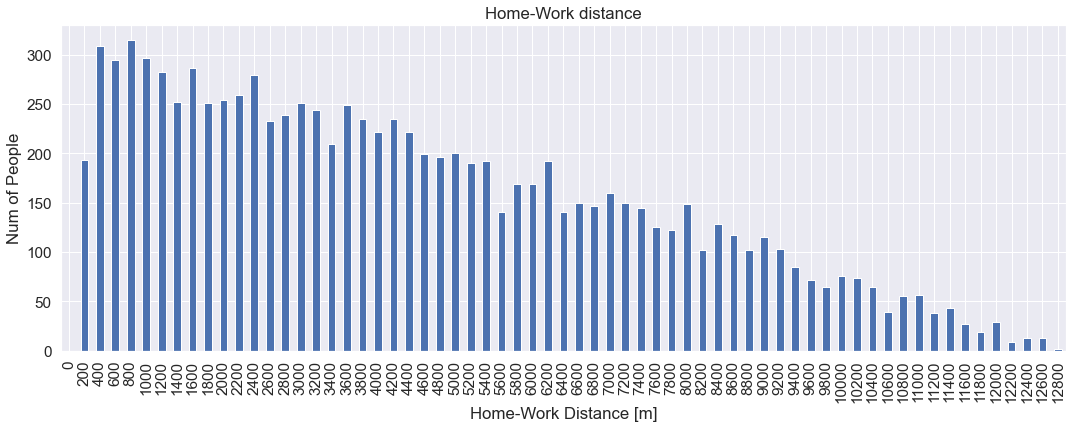

In [15]:
data_file = population_path + ".DistanceInfo.csv"

trip_distance = pd.read_csv(data_file, delimiter=";")
trip_distance["Num of People"] = trip_distance["Count"]

plt.figure(figsize=(18,6))
ax = plot_binned_df(trip_distance, "Distance", "Num of People", 200)
ax.set_xlabel("Home-Work Distance [m]")
ax.set_title("Home-Work distance")